
# Assignment 3

**Submission deadline: last lab session before or on Wednesday, 8.11.17**

**Points: 12 + 4 bonus points**


## Downloading this notebook

This assignment is an Jupyter notebook. Download it by cloning https://github.com/janchorowski/nn_assignments. Follow the instructions in its README for instructions. Whenever possible, add your solutions to the notebook.

For programming exerciese add your solutions to the notebook. For math exercies please provide us with answers on paper or type them in the notebook (it supports Latex-like equations).

Please email us about any problems with it - we will try to correct them quickly. Also, please do not hesitate to use GitHub’s pull requests to send us corrections!

In [15]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


# Problem 1: Gradient Descent [2p + 2b]

The Gradient Descent (GD) algorithm finds the minimum of a given
function by taking small steps along the function's gradient. In
pseudocode:

>$\Theta \leftarrow \Theta_0$

>**while** stop condition not met **do**

>$~~~~$$\Theta \leftarrow \Theta - \alpha \nabla_\Theta f(\Theta)$

>**end while**

where $f$ is the function to minimize, $\nabla_\Theta f(\Theta)$
denotes $f$'s gradient at $\Theta$ and $\alpha$ is the step size,
taking typically values from $10^{-4},\ldots,10^{-1}$.


1. **[1p]** Implement the GD algorithm as a function:

  \begin{equation}
      \Theta_{opt} = \text{GD}(f, \Theta_0, \alpha, \rho),
  \end{equation}

  where $f$ is a function returning the cost and the gradient of the
  cost with respect to parameter vector
  $\Theta$, $\Theta_0$ is the initial value, and $\alpha$
  is the step size (a.k.a. the learning rate).
  You can assume that $\alpha$
  remains constant throughout the optimization.
  Terminate when the function values will differ by less than $\rho$
  between subsequent iterations, eg. by $10^{-10}$.

2. **[1p]** Use the GD algorithm to find the optimum of the
  Rosenbrock (https://en.wikipedia.org/wiki/Rosenbrock_function) function.
  Set $(0,2)$ as the initial point. Try to set an appropriate learning rate
  $\alpha$.

  Plot the values found by GD at subsequent iterations. Set log scale for
  the Y axis.

  Plot function contours and values of $\Theta$ at subsequent
  iterations.
  
  **Note**: You can debug your implementation by using the
  gradient checking routines.
  
  Numerical optimization is of great importance,
  and many algorithms beside GD exists. Get familiar with the L-BFGS
  algorithm
  (for Python: `scipy.optimize.fmin_l_bfgs_b`). Use the
  L-BFGS algorithm to find the optimum of the Rosenbrock function
  and plot the contours and $\Theta$'s in subsequent iterations.

  How many iterations do BGD and L-BFGS need to find a point, for
  which the Rosenbrock function value is lower than $10^{-10}$?
  
3. **[2p bonus]** Implement Newton's method (https://en.wikipedia.org/wiki/Newton's_method_in_optimization) and compare it with the previous methods. You will also need to implement a line search alogithm, e.g. (https://en.wikipedia.org/wiki/Backtracking_line_search) and make sure that the Newton's direction is indeed one along which the function is minimized (the Newton method is only guaranteed to work on convex functions, and behaves badly near critical points of non-convex functions).

In [16]:
#
# Implement the Rosenbrock function
#

from common.gradients import check_gradient

def rosenbrock_v(x):
    """Returns the value of Rosenbrock's function at x"""
    return (1-x[0])*(1-x[0]) + 100*(x[1]-x[0]*x[0])*(x[1]-x[0]*x[0]) # TODO

def rosenbrock(x):
    """Returns the value of rosenbrock's function and its gradient at x
    """
    val = rosenbrock_v(x)
    dVdX= np.array([-2 + 2*x[0] -400*x[0]*x[1] + 400*x[0]*x[0]*x[0],200*(x[1]-x[0]*x[0])]) # TODO
    return [val, dVdX]

#
# Feel free to add your own test points.
#
for test_point in [[0., 0.],
                   [1., 1.],
                   [0.5, 1.0],
                   [1.0, 0.5]]:
    assert check_gradient(rosenbrock, np.array(test_point), prec=1e-5)

In [17]:
#
# Fill in the details of the gradient descent
#

def GD(f, Theta0, alpha, stop_tolerance=1e-10, max_steps=1000000):
    """Runs gradient descent algorithm on f.
    
    The baisic iteration is:
    val, dVdTheta <- f(Theta)
    Theta <- -alpha * dVdTheta
    
    Args:
        f: function that when evalueted on a Theta of same dtype and shape as Theta0
            returns a tuple (value, dVdTheta) with dValuedTheta of the same shape
            as Theta
        Theta0: starting point
        alpha: step length
        stop_tolerance: stop iterations when improvement is below this threhsold
        max_steps: maximum number of steps
        
    Returns:
        tuple:
        - ThetaOpt
        - history: list of length num_steps containing tuples (Theta, (val, dValdTheta))
    
    """
    history = []
    
    Theta = Theta0
    value = np.inf
    
    step = 0
    while step < max_steps:
        previous_value = value
        value, gradient = f(Theta)
        history.append([Theta, (value, gradient)])
        
        if abs(previous_value - value) < stop_tolerance: # TODO
            break
        
        Theta = Theta - alpha * gradient # TODO
        
#         history.append([Theta, f(Theta)])
        step += 1
    
    history.append([Theta, f(Theta)])
    return Theta, history

Found optimum at [ 0.99964674  0.99929219] in 16855 steps (true minimum is at [1,1])


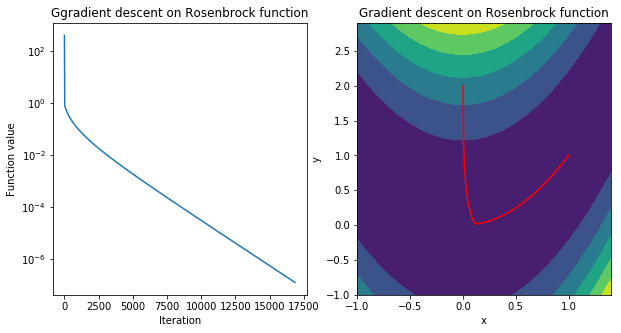

In [18]:
X0 = [0.,2.]
Xopt, Xhist = GD(rosenbrock, X0, alpha=1e-3, stop_tolerance=1e-10, max_steps=1e6)

print "Found optimum at %s in %d steps (true minimum is at [1,1])" % (Xopt, len(Xhist))

fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_size_inches(10,5)

values = [x[1][0] for x in Xhist]
ax1.semilogy(np.arange(len(Xhist)), values)
ax1.set_title("Ggradient descent on Rosenbrock function")
ax1.set_xlabel("Iteration")
ax1.set_ylabel("Function value")


x = np.arange(-1, 1.5, 0.1)
y = np.arange(-1, 3, 0.1)
xx, yy = np.meshgrid(x, y)
z = rosenbrock_v([xx,yy])
ax2.contourf(x,y,z)

thetas = np.array([ i[0] for i in Xhist])
ax2.plot(thetas[:,0],thetas[:,1],color='red')
ax2.set_title("Gradient descent on Rosenbrock function")
ax2.set_xlabel("x")
ax2.set_ylabel("y")

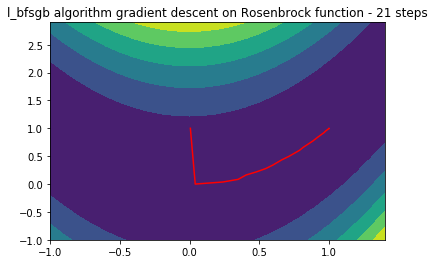

In [19]:
#
# Use scipy.optimize.fmin_l_bfgs_b
# Again plot the path on the coutnour plot
#
# Hint: to save the points you can use the callback argument!
#

import scipy.optimize as sopt
lbfsg_hist = []
def save_hist(x):
    lbfsg_hist.append(np.array(x))
    
x_start = [0.,2.]
lbfsgb_ret = sopt.fmin_l_bfgs_b(rosenbrock, x_start, callback=save_hist, maxfun=15000, maxiter=15000)

#
# TODO: make a conour plot, show points considered by l_bfsgb algorithm and by gradient descent.
# How many steps did l-bfgs take to optimize the Rosenbrock function?
#

x = np.arange(-1, 1.5, 0.1)
y = np.arange(-1, 3, 0.1)
xx, yy = np.meshgrid(x, y)
z = rosenbrock_v([xx,yy])
contourf(x,y,z)

plot(np.array(lbfsg_hist)[:,0],np.array(lbfsg_hist)[:,1], color='red')
title("l_bfsgb algorithm gradient descent on Rosenbrock function - %d steps" % (len(lbfsg_hist)))

Hessian of Rosenbrock function

$ H = 
 \begin{pmatrix}
  -400 (y - x^2) + 800 x^2 + 2 & -400 x \\
  -400 x & 200 
 \end{pmatrix}$ 

Newton's method formula for functions $R^n$ -> $R$

$\mathbf {x} _{n+1}=\mathbf {x} _{n}-\gamma [\mathbf {H} f(\mathbf {x} _{n})]^{-1}\nabla f(\mathbf {x} _{n})$

In [22]:
def rosenbrock_hessian(x):
    
    # TODO: compute the value, gradient and Hessian of Rosenbrock's function'
    val = rosenbrock_v(x)
    
    dVdX= np.array([-2 + 2*x[0] -400*x[0]*x[1] + 400*x[0]*x[0]*x[0],200*(x[1]-x[0]*x[0])])
    
    H = np.array([[-400*(x[1]-x[0]*x[0]) + 800*x[0]*x[0] + 2, -400*x[0]],
                  [-400*x[0], 200 ]])
    
    dvdx0 = dVdX[0]
    dvdx1 = dVdX[1]
    return [val, np.array((dvdx0, dvdx1)), H]


def Newton(f, Theta0, alpha, stop_tolerance=1e-10, max_steps=1000000):
    history = []
    
    Theta = Theta0
    value = np.inf
    
    step = 0
    while step < max_steps:
        previous_value = value
        value, gradient, hessian = f(Theta)
        history.append([Theta, value])
        
        if abs(previous_value - value) < stop_tolerance: 
            break
        
        Theta = Theta - alpha * np.dot(np.linalg.inv(hessian), gradient.T)

        step += 1
    
    history.append([Theta, f(Theta)[0]])
    return Theta, history
    
    
    # TODO:
    #  - implement the newton method and a simple line search
    #  - make sure your function is resilient at critical points (such as seddle points)
    #  - if the Newton direction is not minimizing the function, use the gradient for a few steps
    #  - try to beat L-BFGS on the number of function evaluations needed!
    
Newton(rosenbrock_hessian,np.array([-10.,1.]), 1.)

(array([ 1.,  1.]),
 [[array([-10.,   1.]), 980221.0],
  [array([ -9.99944447,  99.98888945]), 120.98777870365089],
  [array([   0.99932113, -119.97420211]), 1463442.9186997171],
  [array([ 0.99932116,  0.99864278]), 4.6082303479230553e-07],
  [array([ 1.        ,  0.99999954]), 2.1235786933904192e-11],
  [array([ 1.,  1.]), 7.4991089802572435e-29],
  [array([ 1.,  1.]), 7.4991089802572435e-29]])

# Problem 2: Logistic Regression [1p]

Linear regression is suitable for problems, where
the forecasted values are real numbers. We use logistic regression,
when we want to label the data with $0$ and $1$.

Let $x\in \mathbb{R}^n$ be a vector of $n$ real numbers, and
$y\in \{0,1\}$ the given class label. Similarly to what was shown
during the lecture, we add an additional element $x_0=1$
to vector $x$, to account for the bias term (and simplify the equations).

Similarly to linear regression, vector
$\Theta\in \mathbb{R}^{n+1}$ parametrizes the model
($n$ coefficients describes the data, the remaining one is the intercept).
In logistic regression, we model conditional probability that
sample $x$ belongs to class $1$ as:

\begin{equation}
p(\text{class}=1|x, \Theta)=h_\Theta(x) = \sigma\left(\sum_{j=0}^n \Theta_j x_j\right) 
= \sigma\left(\Theta^T x \right),
\end{equation}

where $\sigma(a) = \frac{1}{1+\exp(-a)}$ is being called the logistic sigmoid
(a function, which plot is s-curved).

An unknown sample $x$ is being labeled $1$ if
$h_\Theta(x)\geq 0.5$, or equivalently, $\Theta^T x \geq 0$.

Classification mismatch between the forecasted values and
the data is being measured most of the time with cross-entropy:

\begin{equation}
    J(\Theta) = - \sum_{i=1}^m y^{(i)} \log \left(h_\Theta (x^{(i)})\right) + (1-y^{(i)}) \log \left(1-h_\Theta (x^{(i)})\right),
\end{equation}

assuming $0\log(0)=0$.

Use logistic regression to distinguish
  _Versicolor_ and _Virginica_ irises. Use only the
  `petal length` and `petal width` features. Use either
  Gradient Descent, or L-BFGS to solve for the optimal $\Theta$.
  Prepare the scatterplot of the data and plot the class separation
  boundary found by logistic regression.

In [7]:
from sklearn import datasets
iris = datasets.load_iris()
print 'Features: ', iris.feature_names
print 'Targets: ', iris.target_names
petal_length = iris.data[:,iris.feature_names.index('petal length (cm)')]
petal_width = iris.data[:, iris.feature_names.index('petal width (cm)')]

Features:  ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Targets:  ['setosa' 'versicolor' 'virginica']


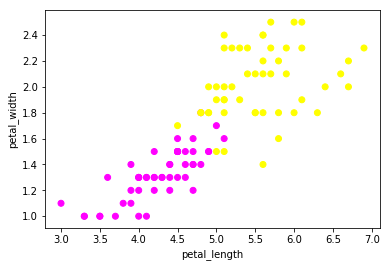

In [8]:
#Extract the petal_length and petal_width of versicolors and virginicas

IrisX = np.vstack([np.ones_like(petal_length), petal_length, petal_width])
IrisX = IrisX[:, iris.target!=0]

# Set versicolor=0 and virginica=1
IrisY = (iris.target[iris.target!=0]-1).reshape(1,-1).astype(np.float64)

scatter(IrisX[1,:], IrisX[2,:], c=IrisY.ravel(), cmap='spring')
xlabel('petal_length')
ylabel('petal_width')

(2.7951433691756273, 7.104856630824373)

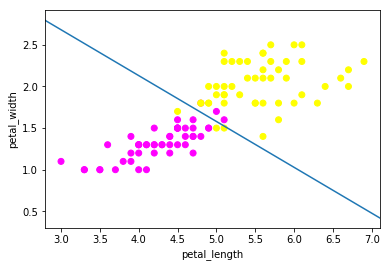

In [9]:
import scipy.optimize as sopt

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

class LogisticRegressionCost(object):
    def __init__(self, X, Y):
        self.X = X
        self.Y = Y
    
    #note: this creates a Pyton callable - i.e. an abject that can be called as a function
    def __call__(self, Theta):
        X = self.X
        Y = self.Y
        
        #reshape Theta
        ThetaR = Theta.reshape(X.shape[0],1)
        
        Z = np.dot(ThetaR.T, X) 
        nll = -np.sum(Y * np.log(sigmoid(Z)) + (1 - Y) * np.log(1 - sigmoid(Z))) 
        grad = np.dot(X, (sigmoid(Z) - Y).T) #TODO
        
        #reshape grad into the shape of Theta, for fmin_l_bfsgb to work
        return nll, grad.reshape(Theta.shape)

iris_log_reg = LogisticRegressionCost(IrisX, IrisY)

#TODO: add afew gradient checks as in the code above!
for test_point in [[0., 0.],
                   [1., 1.],
                   [0.5, 1.0],
                   [1.0, 0.5]]:
    assert check_gradient(rosenbrock, np.array(test_point), prec=1e-5)

Theta0 = np.zeros((3))

#
# Call a solver
#

ThetaOpt = sopt.fmin_l_bfgs_b(iris_log_reg, Theta0)[0] # TODO

#
# Now plot the found separation line 
# 

scatter(IrisX[1,:], IrisX[2,:], c=IrisY.ravel(), cmap='spring')
xlabel('petal_length')
ylabel('petal_width')
pl_min, pl_max = xlim()
pl = linspace(pl_min, pl_max, 1000)
plot(pl, -(ThetaOpt[0]+ThetaOpt[1]*pl)/ThetaOpt[2])
xlim(pl_min, pl_max)

# Problem 3: Backpropagation through a *tanh* Neuron [2p]


In the following assignments let:
 * $X \in \mathbb{R}^{k\times N}$ be the data matrix containing $N$
  samples each described with $k$ features. The $i$-th sample $x^{(i)} \in
  \mathbb{R}^{(k\times 1)}$ is the $i$-th column of $X$.
 * $Y \in \mathbb{R}^{1\times N}$ be the row-vector of targets,
  with $y^{(i)}$ being the target for the $i$-th sample.
 * $\Theta\in\mathbb{R}^{k\times 1}$ be the vector of parameters.


  We want to use a single neuron with the $\tanh(x) = \frac{e^x -
    e^{-x}}{e^x + e^{-x}}$ activation function.
  First find the derivative $\frac{\partial \tanh(x)}{\partial
    x}$ and express it as a function of $\tanh(x)$.
  Forward computations performed by the neuron are:
  
  \begin{align*}
    A &= \Theta^T X \\
    \hat{Y} &= \tanh(A) \text{ applied elementwise} \\
    E &= Y - \hat{Y} \\
    J &= E \cdot E^T
  \end{align*}

___


**[2p]**  Find and express using matrix notation the following gradients. You
  can refer to values and gradients computed earlier in the expressions for the
  following ones -- just as you would when implementing a computer
  program. Use $\odot$ for the elementwise multiplication of matrices.

  \begin{align*}
    \frac{\partial J}{\partial E } &= 2E  \\
    \frac{\partial J}{\partial \hat{Y}} &= -2E  \\
    \frac{\partial J}{\partial A} &= (\hat{Y} \odot \hat{Y} - 1) \odot 2E \\
    \frac{\partial J}{\partial \Theta} &= \frac{\partial J}{\partial A} X^{T} \\
  \end{align*}
  
  **Note:** each gradient above should be implementable as a
  compact expression in Python+NumPy.

  **Hint:** write down the shapes of all values that you
  compute. Work out the expressions for a single element of the
  gradient, then see how they can be expressed using the matrix
  notation.

# Problem 4: SoftMax Regression [2p]

The samples in the Iris dataset belong to one of three classes, while in
CIFAR10 and MNIST they belong to one of 10 classes. Thus, linear regression cannot be
applied because it distinguishes between two classes only.
We will use SoftMax regression instead.

Let $x\in \mathbb{R}^n$ be a sample vector and
$y\in \{1,2,\ldots,K\}$ its class label.
Similarly to what has been done during the lecture,
we extend vector $x$ with the bias term $x_0=1$ to simplify the calculations
(so now $x\in \mathbb{R}^{n+1}$).

In SoftMax regression, we model conditional probability, that 
a given sample $x$ belongs to class $k$. Such model is parametrized
with a matrix $\Theta\in\mathbb{R}^{K \times n+1}$.
Note that in SoftMax regression, a separate linear model is build for each
class. First we compute the vector $a$ of total inputs:
\begin{equation}
a_k = \sum_{j=0}^{n}\Theta_{k,j}x_j,
\end{equation}
or using matrix notation $a = \Theta x$.
Then we compute conditional probabilities using SoftMax regression:
\begin{equation}
p(\text{class}=k|x, \Theta)= o_k = \frac{\exp{a_k}}{\sum_{j=1}^K \exp{a_j}}.
\end{equation}

Function SoftMax transforms a $K$-element vector of real numbers
to a vector of non-negative numbers which sum to 1. Thus they can be
treated as probabilities assigned to $K$ separate classes.

As it is the case with linear regression, we use cross-entropy
as the loss function in SoftMax regression:
\begin{equation}
\begin{split}
J^{(i)}(\Theta) &= - \sum_{k=1}^{K} [y^{(i)}=k]\log o_k^{(i)} \\
J(\Theta) &= \frac{1}{m}\sum_{i=1}^m J^{(i)}(\Theta)= -\frac{1}{m}\sum_{i=1}^m\sum_{k=1}^{K} [y^{(i)}=k]\log o_k^{(i)} 
\end{split}
\end{equation}

where $[y^{(i)}=k]$ equals $1$ when the $i-$th sample belongs to class $k$,
and $0$ otherwise.
Value $[y^{(i)}=k]$ might be interpreted as the correct value of the $k$-th
output of the model on sample $i$.
In addition, the total loss is expressed as a mean loss of particular samples,
to make it independent of the size of the training set.

Loss function gradient with respect to total inputs $a$ is simple:
\begin{equation}
    \frac{\partial J^{(i)}}{\partial a^{(i)}_k} = o_k^{(i)} - [y^{(i)}=k].
\end{equation}

Using the chain rule, the gradient of the loss function with respect to
model parameters becomes:
\begin{equation}
    \frac{\partial J}{\partial \Theta_{kj}} = \sum_{i=1}^m \frac{\partial J}{\partial J^{(i)}}\frac{\partial J^{(i)}}{\partial \Theta_{kj}} = \sum_{i=1}^m \frac{1}{m}\cdot \frac{\partial J^{(i)}}{\partial a^{(i)}_k} \frac{\partial a^{(i)}_k}{\partial \Theta_{kj}} = \frac{1}{m}\sum_{i=1}^m \frac{\partial J^{(i)}}{\partial a^{(i)}_k} x^{(i)}_j.
\end{equation}

___

1. **[2p]**
  Implement SoftMax regression and apply it to the Iris dataset.
  During training, use L-BFGS from `scipy.optimize`. You can initialize the algorithm
  with a null matrix (all entries being zeros).
  Obtained accuracy should be comparable with that of k-NN
  (roughly 3% of errors).
  If your model doesn't work, check the gradient using the `check_gradient`
  routine from the Starter Code of Assignment 3, which computes the gradient numerically.

IrisXFull is a (5, 150)-shaped matrix of float64
IrisX2feats is a (3, 150)-shaped matrix of float64
IrisY is a (1, 150)-shaped matrix of int64


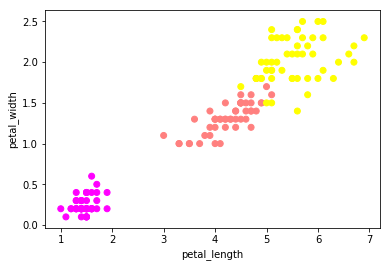

In [10]:
#
# Here we load the IRIS dataset.
# We will create two datasets:
#  - one using all features,
#  - one using just Petal Langth and Petal Width for visualizations.
#
iris = datasets.load_iris()
petal_length = iris.data[:, iris.feature_names.index('petal length (cm)')]
petal_width = iris.data[:, iris.feature_names.index('petal width (cm)')]
sepal_length = iris.data[:, iris.feature_names.index('sepal length (cm)')]
sepal_width = iris.data[:, iris.feature_names.index('sepal width (cm)')]

IrisXFull = np.vstack([np.ones_like(petal_length), iris.data.T])
IrisX2feats = np.vstack([np.ones_like(petal_length), petal_length, petal_width])
IrisY = iris.target.reshape(1, -1).astype(np.int64)

print "IrisXFull is a %s-shaped matrix of %s" % (IrisXFull.shape, IrisXFull.dtype)
print "IrisX2feats is a %s-shaped matrix of %s" % (IrisX2feats.shape, IrisX2feats.dtype)
print "IrisY is a %s-shaped matrix of %s" % (IrisY.shape, IrisY.dtype)

scatter(IrisX2feats[1, :], IrisX2feats[2, :], c=IrisY.ravel(), cmap='spring')
xlabel('petal_length')
ylabel('petal_width')

In [11]:
def SoftMaxRegression_implementation(ThetaFlat, X, Y=None, return_probabilities=False):
    """
    Compute the outputs of a softmax classifier, or the loss and gradient

    Parameters
    ----------
    ThetaFlat : 
        flat array of parameters containing (n_features*n_classes) entries
    X :
        array of features, shape n_features x n_smaples
    Y :
        optional array of desired targets of shape 1 x n_samples
    return_probabilities : 
        if True, the probabilities are returned and Y is not used
        if False, the los and gradient is computed on the X,Y pairs
    """
    # X is num_features x num_samples
    num_features, num_samples = X.shape

    # We first reshape ThetaFlat into Theta
    # Theta is num_features x num_classes
    Theta = ThetaFlat.reshape(num_features, -1)
    
    # Get number of classes
    num_classes = Theta.shape[1]

    # Activation of softmax neurons
    # A's shape should be num_classes x num_samples
    A = np.dot(Theta.T, X) # TODO

    # Now compute the SoftMax function
    # O will be a num_classes x num_samples matrix of probabilities assigned by our model
    # Stability optimization - for each subtract the maximum activation
    O = A - A.max(0, keepdims=True)

    # Compute SoftMax as vector O. Take the exp and normalize, so all values of O
    #        would sum to 1.0.
    O = np.exp(O) # TODO
    O /= np.sum(O, axis=0) # TODO

    if return_probabilities:
        return O

    # The loss is the average per-sample nll (neg log likelihood)
    # The nll is the sum of the logarithms of probabilities assigned to each class
    correct_class_likelihoods = np.log(O[Y.ravel(), np.arange(num_samples)])
    L = - 1.0 / num_samples * np.sum(correct_class_likelihoods)

    # For the softmax activation and cross-entropy loss, the derivative dNLL/dA has a simple form
    dLdA = O - (Y == np.array([np.arange(num_classes)]).T) # TODO
    
    # Now we compute the gradient of the loss with respect to Theta
    dLdTheta = np.dot(X, dLdA.T) / num_samples  # TODO divide by num_samples

    # reshape gard into the shape of Theta, for fmin_l_bfsgb to work
    return L, dLdTheta.reshape(ThetaFlat.shape)


# Make a function for training on irises
def iris_log_reg_cost(Theta): 
    return SoftMaxRegression_implementation(Theta, IrisXFull, IrisY, False)


# Make sure that the gradient computation is OK
check_gradient(iris_log_reg_cost, np.zeros((3 * 5,)))
check_gradient(iris_log_reg_cost, np.random.rand(3 * 5) * 2.0 - 1.0)

True

In [12]:
#
# Call the solver
#

# NOTE: iprint will cause the solver to print TO THE TERMINAL
#       from which ipython notebook was started
ThetaOpt = sopt.fmin_l_bfgs_b(iris_log_reg_cost, np.zeros((3 * 5,)), iprint=1)[0]

check_gradient(iris_log_reg_cost, ThetaOpt)

True

In [14]:
#
# Compute training errors
#

probabilities = SoftMaxRegression_implementation(ThetaOpt, IrisXFull, return_probabilities=True)
predictions = np.argmax(probabilities, 0)

print "Training accurracy: %f%%" % ((predictions == IrisY.ravel()).mean() * 100)

Training accurracy: 98.666667%


In [15]:
#
# Now redo the training for two features
#
# TODO: again, use l_bfgs to find optimal theta, 
#       then compute probabilities and new predictions.
#

def iris_log_reg_cost2(Theta): 
    return SoftMaxRegression_implementation(Theta, IrisX2feats, IrisY, False)

ThetaOpt2 = sopt.fmin_l_bfgs_b(iris_log_reg_cost2, np.zeros((3 * 5,)), iprint=1)[0]

check_gradient(iris_log_reg_cost2, ThetaOpt2)

probabilities2 = SoftMaxRegression_implementation(ThetaOpt2, IrisX2feats, return_probabilities=True)
predictions2 = np.argmax(probabilities2, 0)

print "Training accurracy: %f%%" % ((predictions2==IrisY.ravel()).mean()*100)

Training accurracy: 96.000000%


In [16]:
#
# Now plot the decision boundary
#

petal_lengths, petal_widths = np.meshgrid(
    np.linspace(IrisX2feats[1, :].min(), IrisX2feats[1, :].max(), 100),
    np.linspace(IrisX2feats[2, :].min(), IrisX2feats[2, :].max(), 100))

IrisXGrid = np.vstack([np.ones(np.prod(petal_lengths.shape)),
                       petal_lengths.ravel(), petal_widths.ravel()])
predictions_Grid = SoftMaxRegression_implementation(
    ThetaOpt2, IrisXGrid, return_probabilities=True).argmax(0)

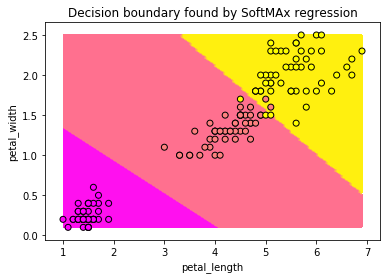

In [17]:
contourf(petal_lengths, petal_widths, predictions_Grid.reshape(petal_lengths.shape), cmap='spring')
scatter(IrisX2feats[1,:], IrisX2feats[2,:], c=IrisY.ravel(), cmap='spring', edgecolor='black')
xlabel('petal_length')
ylabel('petal_width')
title('Decision boundary found by SoftMAx regression')

# Problem 5: 2-layer Neural Network [2p]

The task is to extend the SoftMax regression model to a 2-layer neural net.
The network will transform an input vector to an activation vector
of hidden neurons and finally, using the SoftMax function,
to a vector of probabilities of the sample's belonging to one of 10 classes.

To train the network, we'll need the loss function $J$ and its gradient
with respect to network's parameters (weights and biases).
For a 2-layer net, this can be achieved using the following relationships:

### Data

The training set has $m$ samples of $n$ dimensions, belonging to one
of $K$ classes, it is given as a set of matrices: $X \in \mathbb{R}^{n\times m}$
and $Y\in \{1,2,\ldots,K\}^{1\times m}$.

### Parameters

The net will have 2 layers: 1) a hidden one, having $L$ neurons,
and 2) an output one, having $K$ neurons (one for each of $K$ classes).
The layers are defined through:


1. the parameters of the hidden layer, which maps $n$-dimensional input vectors
  into activations of $L$ neurons:
  weight matrix $W^h\in\mathbb{R}^{L\times n}$ and bias vector
  $b^h\in\mathbb{R}^{L\times 1}$,
  
2. the parameters of the output layer, which maps $L$-dimensional vector
  of activations of the hidden layer to $K$ activations of output neurons:
  weight matrix $W^o\in{K\times L}$ and bias vector $b^o\in\mathbb{R}^{K\times 1}$.

### Signal forward propagation (fprop)

Each hidden neuron computes its total input as a sum of product of its
inputs, weight matrix and bias. For an $i$-th sample,
the total input
${a^{h}}^{(i)}_l $ of an $I$-th neuron is thus:
\begin{equation}
{a^h}^{(i)}_l = \sum_{j=1}^n {W^h}_{l,j}x^{(i)}_j + {b^h}_l
\end{equation}
The total input of neurons might also be expressed via matrices,
using matrix multiplication and broadcasting (which allows to add
a column vector to all column vectors of a matrix):
\begin{equation}
{a^h} = W^h\cdot x + b^h
\end{equation}
This can be implemented in Python as `ah = W.dot(x) + b`.

Next, we compute activation $h^h$ of hidden neurons with hyperbolic tangent
$\tanh(a) = \frac{e^a-e^{-a}}{e^a+e^{-a}}$:
\begin{equation}
{h^h}^{(i)}_l=\tanh({a^h}^{(i)}_l)
\end{equation}
Thanks to vectorization in Python + numpy, $h^h$ might be computed with a single
expression `hh = numpy.tanh(ah)`.

Total input of the output layer can be computed using
activations of the hidden layer (with the help of broadcasting) as:

\begin{equation}
a^o = W^o\cdot h^h + b^o
\end{equation}

Finally, probabilities of a sample's belonging to  particular classes
have to be computed. This can be achieved with SoftMax:

\begin{equation}
    p(y^{(i)}=k|x^{(i)}) = o^{(i)}_k = \frac{\exp({a^o}^{(i)}_k)}{ \sum_{k'=1}^K \exp( {a^o}^{(i)}_{k'} )}.
\end{equation}

Like with SoftMax regression, we will use cross-entropy
as the loss function:

\begin{equation}
\begin{split}
J^{(i)}(\Theta) &= - \sum_{k=1}^{K} [y^{(i)}=k]\log o_k^{(i)}, \\
J(\Theta) &= \frac{1}{m}\sum_{i=1}^m J^{(i)}(\Theta)= -\frac{1}{m}\sum_{i=1}^n\sum_{k=1}^{K} [y^{(i)}=k]\log o_k^{(i)}.
\end{split}
\end{equation}

### Error backpropagation (bprop)

Using the chain rule one can derive the gradient of the loss function
in respect to neurons' activations and network parameters.


First we compute the gradient with respect to the output layer's
total inputs:

\begin{equation}
    \frac{\partial J}{\partial {a^o}^{(i)}_k} = \frac{1}{m}(o_k^{(i)} - [y^{(i)}=k]),
\end{equation}

then we compute the gradient with respect to activations of hidden units:

\begin{equation}
    \frac{\partial J}{\partial {h^h}^{(i)}_l} = \sum_{k=1}^K \frac{\partial J}{\partial {a^o}^{(i)}_k} \frac{\partial {a^o}^{(i)}_k}{\partial {h^h}^{(i)}_l} =  \sum_{k=1}^K \frac{\partial J}{\partial {a^o}^{(i)}_k} {W^o}_{kl},
\end{equation}
then we compute the gradient with respect to the total activations of hidden units:

\begin{equation}
    \frac{\partial J}{\partial {a^h}^{(i)}_l} = \frac{\partial J}{\partial {h^h}^{(i)}_l}\frac{\partial {h^h}^{(i)}_l}{\partial {a^h}^{(i)}_l} = \frac{\partial J}{\partial {h^h}^{(i)}_l} (1 - ({h^h}^{(i)}_l)^2),
\end{equation}

where we have used the relationship

$\frac{\partial \tanh(x)}{\partial x} = 1-\tanh(x)^2$.

Finally we can use the gradients with respect to the total inputs to
compute the gradients with respect to network parameters,
eg. for the input layer:

\begin{equation}
    \frac{\partial J}{\partial {W^o}_{kl}} = \sum_{i}\frac{\partial J}{\partial {a^o}^{(i)}_k}\frac{\partial {a^o}^{(i)}_k}{\partial {W^o}_{kl}} = \sum_{i}\frac{\partial J}{\partial {a^o}^{(i)}_k}{h^h}^{(i)}_l,
\end{equation}

\begin{equation}
    \frac{\partial J}{\partial {b^o}_{k}} = \sum_{i}\frac{\partial J}{\partial {a^o}^{(i)}_k}\frac{\partial {a^o}^{(i)}_k}{\partial {b^o}_{k}} = \sum_{i}\frac{\partial J}{\partial {a^o}^{(i)}_k}.
\end{equation}

___

1. **[1.5p]**
  Implement a 2-layer neural network as a function
  **TwoLayerNet($\Theta$,X,Y)**
  which computes the loss and gradient of loss with
  respect to the weights and bias terms (encoded as $\Theta$)
  on data given as $X$ and $Y$.
  Refer to the Starter Code below for the details.
  Try to express as much as possible with matrix calculus.

2. **[0.5p]**
  In the cases of linear and logistic regression,
  we could start the optimization with a vector of zeros.
  Such initialization will be troublesome for neural networks.

  You can use the following initialization methods for
  network parameters: a) initialize weight matrices with small random
  numbers (eg. drawn from $\mathcal{N}(0, 0.2)$), b) initialize bias
  vectors with zeros. Train the network on the Iris dataset and report
  classification accuracy.


  The following problems will require to train the network.
  Use the L-BFGS optimizer from `scipy.optimize` to minimize
  your function (particularly: the loss) and find the right $\Theta$.

In [25]:
from common.gradients import check_gradient, encode_params, decode_params


def TwoLayerNet_implementation(ThetaFlat, ThetaShapes, X, Y=None, return_probabilities=False):
    """
    Compute the outputs of a softmax classifier, or the loss and gradient
    
    Parameters
    ----------
    ThetaFlat : 
        flat array of parameters
    ThetaShapes :
        list of shapes of weight and bias matrices
    X :
        array of features, shape n_features x n_smaples
    Y :
        optional array of desired targets of shape 1 x n_samples
    return_probabilities : 
        if True, the probabilities are returned and Y is not used
        if False, the los and gradient is computed on the X,Y pairs
    """
    #X is num_features x num_samples
    num_features, num_samples = X.shape
    
    # Get num_classes
    num_classes = ThetaShapes[1][0] 

    #Extract weight matrices
    W1, W2 = decode_params(ThetaFlat, ThetaShapes)
    
    X_padded = np.vstack([np.ones((1, num_samples)), X])
    
    #Activation in first layer. Shape is num_hidden x num_samples
    A1 = W1.dot(X_padded) # TODO

    #Apply the transfer function
    H1 = np.tanh(A1)     # TODO
        
    #Pad with zeros
    H1_padded = np.vstack([np.ones((1, num_samples)), H1])
    
    #Now apply the second linear transform
    A2 = W2.dot(H1_padded)     # TODO
    
    #Now compute the SoftMax function
    #O will be a num_classes x num_samples matrix of probabilities assigned by our model  
    #Stability optimization - for each subtract the maximum activation
    O = A2 - A2.max(0, keepdims=True)
    # 
    # TODO - compute SoftMax as vector O. Take the exp and normalize, so all values of O
    #        would sum to 1.0.
    O = np.exp(O)
    O /= np.sum(O, axis=0)

    if return_probabilities:
        return O
    
    #The loss is the average per-sample nll (neg log likelihood)
    #The nll is the sum of the logarithms of probabilities assigned to each class
    correct_class_likelihoods = np.log(O[Y.ravel(), np.arange(num_samples)])
    L = - 1.0/num_samples * np.sum(correct_class_likelihoods)

    #For the softmax activation and cross-entropy loss, the derivative dNLL/dA has a simple form
    dLdA2 =  (O - (Y == np.array([np.arange(num_classes)]).T) ) / num_samples # TODO

    dLdH1_padded = W2.T.dot(dLdA2)
    dLdH1 = dLdH1_padded[1:,:] #ship the derivatives backpropagated to the added ones
    
    #
    # compute the derivatives dLdW2 and dLdW1
    # Hint - to compute dLdW1, start with dLdA1
    
    dLdA1 = dLdH1 * (1 - H1 ** 2 )
    dLdW1 = np.dot(dLdA1, X_padded.T)
    dLdW2 = np.dot(dLdA2, H1_padded.T)
    
    
    dLdThetaFlat, unused_shapes = encode_params([dLdW1, dLdW2])
    
    #reshape gard into the shape of Theta, for fmin_l_bfsgb to work
    return L, dLdThetaFlat

In [45]:
#
# Here we init the network for gradient testing on IRIS
#
# We will have 7 hidden neurons.
# The first weight matrix will be 5 (4 features + bias) x 7 (hidden neurons) NOPE
# The second weight matrix will be 8 (7 neurons + bias) x 3 (classes) NOPE
#
num_hidden = 7
#
# TODO
W1 = np.random.rand(num_hidden,5)
W2 = np.random.rand(3, num_hidden + 1)
#

# Now flatten into an array
Theta0, ThetaShape = encode_params([W1,W2])

#Make a function for training on irises
iris_net_cost = lambda Theta: TwoLayerNet_implementation(Theta, ThetaShape, iris.data.T, IrisY, False)
#Make sure that the gradient computation is OK
check_gradient(iris_net_cost, Theta0)
check_gradient(iris_net_cost, np.zeros_like(Theta0))
check_gradient(iris_net_cost, np.ones_like(Theta0)*0.01)

True

In [46]:
#
# TODO - apply L-BFGS to minimize the loss and get optimal ThetaOpt.
ThetaOpt = sopt.fmin_l_bfgs_b(iris_net_cost, Theta0, iprint=1)[0]

predictions = TwoLayerNet_implementation(ThetaOpt, ThetaShape, iris.data.T, return_probabilities=True).argmax(0)
print "Training accurracy: %f%%" % ((predictions==IrisY.ravel()).mean()*100)

Training accurracy: 99.333333%


## Problem 6: XOR, Iris and MNIST [2p + 2b]

1. **[2p]** Solve the following with a 2-layer neural network:
    1. Test your network on a 2-dimensional and a 3-dimensional
    XOR problem. How many hidden neurons the network requires to express
    the XOR function?
    2. Normalize the Iris dataset, so that each of the 4 attributes
    would fall into {[}-1,1{]} interval. Train the network and check classification
    accuracy. 
2. **[1p bonus]** Overfit to the data by reaching 100% *training*
    accuracy on the MNIST dataset. Remember to normalize the data.
3. **[1p bonus]** Plot samples (for XOR or for Iris) in hidden neurons' activation space
    (similarly to http://colah.github.io/posts/2014-03-NN-Manifolds-Topology/).

In [47]:
XOR2X = np.array([[0,0],
                  [0,1],
                  [1,0],
                  [1,1]]).T
XOR2Y = np.array([[0,1,1,0]])

In [220]:
#init the neurons
num_hidden = 3
W1 = (np.random.rand(num_hidden,3) - 0.5)
W2 = (np.random.rand(2,num_hidden+1) -0.5)

# Now flatten into an array
Theta0, ThetaShape = encode_params([W1,W2])

#
# TODO - apply L-BFGS to minimize the loss and get optimal ThetaOpt.
xor_net_cost = lambda Theta: TwoLayerNet_implementation(Theta, ThetaShape, XOR2X, XOR2Y, False)

ThetaOpt = sopt.fmin_l_bfgs_b(xor_net_cost, Theta0, iprint=1)[0]

predictions = TwoLayerNet_implementation(ThetaOpt, ThetaShape, XOR2X, return_probabilities=True).argmax(0)
print "Training accurracy: %f%%" % ((predictions==XOR2Y.ravel()).mean()*100)

Training accurracy: 100.000000%


In [179]:
#
# TODO - repeat the experiment for 3-dimensional XOR.
#

XOR3X = np.array([[0,0,0],
                  [0,0,1],
                  [0,1,0],
                  [0,1,1],
                  [1,0,0],
                  [1,0,1],
                  [1,1,0],
                  [1,1,1]]).T

XOR3Y = np.array([0,1,1,0,1,0,0,1])

In [248]:
num_hidden = 5
W1 = (np.random.rand(num_hidden,4) - 0.5)
W2 = (np.random.rand(2,num_hidden+1) -0.5)

# Now flatten into an array
Theta0, ThetaShape = encode_params([W1,W2])

#
# TODO - apply L-BFGS to minimize the loss and get optimal ThetaOpt.
xor_net_cost = lambda Theta: TwoLayerNet_implementation(Theta, ThetaShape, XOR3X, XOR3Y, False)

ThetaOpt = sopt.fmin_l_bfgs_b(xor_net_cost, Theta0, iprint=1)[0]

predictions = TwoLayerNet_implementation(ThetaOpt, ThetaShape, XOR3X, return_probabilities=True).argmax(0)
print "Training accurracy: %f%%" % ((predictions==XOR3Y.ravel()).mean()*100)

Training accurracy: 100.000000%


In [229]:
IrisNormX = np.array(iris.data.T)
#
# TODO - normalize IrisNormX, so the vlaues would fall into [-1,1].
#        Avoid looping constructs.
IrisNormX = np.tanh(IrisNormX)

In [257]:
#
# TODO - set the parameters
#
num_hidden = 5 
W1 = np.random.rand(num_hidden, 5)
W2 = np.random.rand(3,num_hidden+1) # parameter

Theta0, ThetaShape = encode_params([W1, W2])

#
# TODO - train the network
iris_net_cost = lambda Theta: TwoLayerNet_implementation(Theta, ThetaShape, IrisNormX, IrisY, False)
ThetaOpt = sopt.fmin_l_bfgs_b(iris_net_cost, Theta0, iprint=1)[0]

predictions = TwoLayerNet_implementation(ThetaOpt, ThetaShape, IrisNormX, return_probabilities=True).argmax(0)
print "Training accurracy: %f%%" % ((predictions == IrisY.ravel()).mean() * 100)

Training accurracy: 98.000000%


In [ ]:
try:
    import torchvision

    data_path = os.environ.get('PYTORCH_DATA_PATH', '../data')

    mnist_train_dataset = torchvision.datasets.MNIST(
        data_path, train=True, download=True)
    mnist_train_data_uint8 = mnist_train_dataset.train_data.numpy()
    mnist_train_labels_int64 = mnist_train_dataset.train_labels.numpy()

    mnist_test_dataset = torchvision.datasets.MNIST(
        data_path, train=False, download=True)
    mnist_test_data_uint8 = mnist_test_dataset.test_data.numpy()
    mnist_test_labels_int64 = mnist_test_dataset.test_labels.numpy()
    
except ImportError:
    # Load the same data without torchvision (e.g., on a personal machine)
    with np.load('/pio/data/data/nn17/mnist.npz') as data:
        mnist_train_data_uint8 = data['train_data']
        mnist_train_labels_int64 = data['train_labels']
        mnist_test_data_uint8 = data['test_data']
        mnist_test_labels_int64 = data['test_labels']

In [ ]:
#
# TODO - normalize the data
#

#
# TODO - set parameters, train on the MNIST dataset
#        and report training accuracy
#

In [ ]:
#
# (Bonus)
# TODO - change network implementation code to return hidden activations.
# Hint - locals() gives the dictionary of all objects in a functions's scope!
#

# Problem 7 [1p]

Answer the following:
  
   * Are neural networks parametric (https://en.wikipedia.org/wiki/Parametric_model) or non-parametric (https://en.wikipedia.org/wiki/Non-parametric_model) models? Why is it so?
   
   * What will happen if for each layer (hidden and output) all weights
    will be initialized to the same values before the training?
    
   * How will the value of SoftMax function change,
  if we will add the same constant term to each element of $a$?
  Often, before computing SoftMax, the largest value can be subtracted
  to mitigate large exponents and associated numerical errors.
  Is it a good practice?

   * Are two-class SoftMax regression and logistic regression equivalent (can you build a logistic regression model from a given softmax one and vice versa)?

* Yes. In a "parametric" model all the parameters are in finite-dimensional parameter spaces.
* Net would not learn.
* Nic się nie zmieni. To dobra praktyka.
* SoftMax jest ogólniejszy.